<a href="https://colab.research.google.com/github/Silosk01/IA_/blob/main/Pr%C3%A1ctica_2_Perceptr%C3%B3n_multicapa_Fuente_de_datos_personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

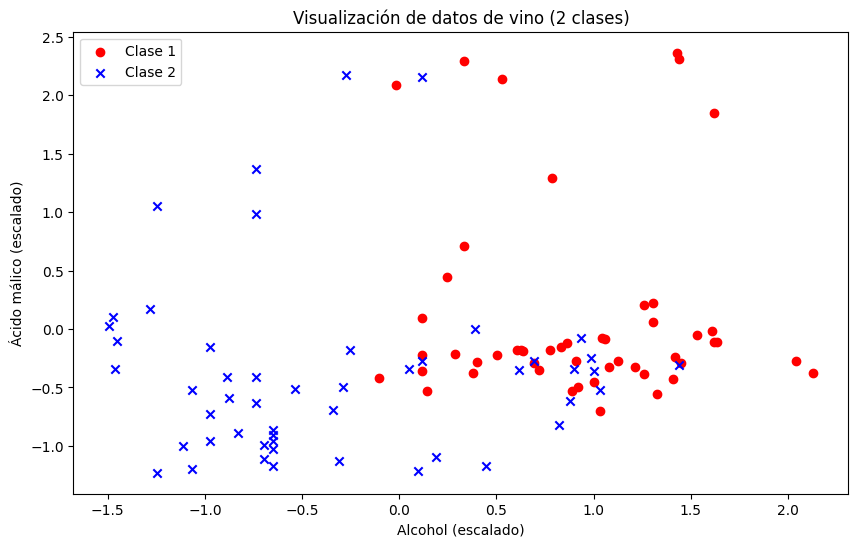

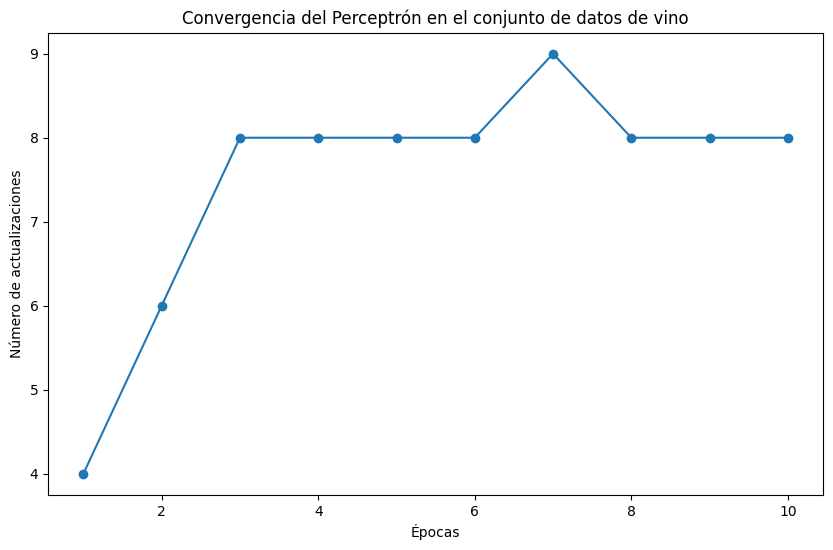

Precisión del modelo: 0.71


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

def load_wine_data(url):
    column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
    df = pd.read_csv(url, names=column_names)

    df = df[df['Class'].isin([1, 2])]

    X = df.iloc[:, [1, 2]].values
    y = df.iloc[:, 0].values
    y = np.where(y == 1, -1, 1)

    return X, y

def preprocess_data(X):
    # Escala los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def plot_data_and_errors(X, y, ppn):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

    # Gráfico de dispersión
    ax1.scatter(X[y == -1, 0], X[y == -1, 1],
               color='red', marker='o', label='Clase 1')
    ax1.scatter(X[y == 1, 0], X[y == 1, 1],
               color='blue', marker='x', label='Clase 2')
    ax1.set_xlabel('Alcohol (escalado)')
    ax1.set_ylabel('Ácido málico (escalado)')
    ax1.legend(loc='upper left')
    ax1.set_title('Visualización de datos de vino')

    # Gráfico de errores
    ax2.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    ax2.set_xlabel('Épocas')
    ax2.set_ylabel('Número de actualizaciones')
    ax2.set_title('Convergencia del Perceptrón')

    plt.tight_layout()
    plt.show()

# Carga y preprocesa los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
X, y = load_wine_data(url)
X_scaled = preprocess_data(X)

# Entrena el modelo
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_scaled, y)

# Visualiza los datos y errores
plot_data_and_errors(X_scaled, y, ppn)

# Evalua el modelo
y_pred = ppn.predict(X_scaled)
accuracy = np.mean(y_pred == y)
print(f'Precisión del modelo: {accuracy:.2f}')